# 1.Relational plots（关系图）
Seaborn中介绍的第一种类型的图就是Relational plots（关系图），这里翻译一下官网对他的解释：“统计分析是理解数据集中变量如何相互关联以及这些关系如何依赖于其他变量的过程。可视化可能是这个过程的核心部分，因为当数据被正确地可视化时，人类视觉系统可以看到指示某种关系的趋势和模式。”<br>
Relational plots（关系图）中主要讨论的是三个seaborn函数。我们最常用的是relplot()。这是一个图形级函数使用两种常用方法可视化统计关系：散点图（scatter plots）和线图（line plots）。
```python
scatterplot() (与kind="scatter"；默认值)
lineplot() (与kind="line")
```


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid") #这是seaborn默认的风格

## 1.1 scatterplot（散点图）
散点图是统计可视化的重要组成部分。它使用点云来描述两个变量的联合分布，其中每个点代表数据集中的一个观察。这种描绘可以推断出大量关于它们之间是否有任何有意义的关系的信息。<br>
在seaborn中有几种（后面介绍）绘制散点图的方法，当两个变量都是数字时，应该使用的最基本的是scatterplot()功能。在Categorical plots（分类图）中，我们将看到使用散点图可视化分类数据的专门工具。
```python
#scatterplot参数
seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None,markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
在所有的seaborn绘图时，里面的参数是众多的，但是不用担心，大部分参数是相同的，只有少部分存在差异，有些通过对单词的理解就可知道其含义，这里我只根据每个具体的图形重要的参数做一些解释，并简单的介绍这些常用参数的含义。
```
* x，y：容易理解就是你需要传入的数据，一般为dataframe中的列；
* hue：也是具体的某一可以用做分类的列，作用是分类；
* data：是你的数据集，可要可不要，一般都是dataframe；
* style：绘图的风格（后面单独介绍）；
* size：绘图的大小（后面介绍）；
* palette：调色板（后面单独介绍）；
* markers：绘图的形状（后面介绍）；
* ci：允许的误差范围（空值误差的百分比，0-100之间），可为‘sd’，则采用标准差（默认95）；
* n_boot（int）：计算置信区间要使用的迭代次数；
* alpha：透明度；
* x_jitter，y_jitter：设置点的抖动程度。
先来个简单的散点图，绘制看看效果


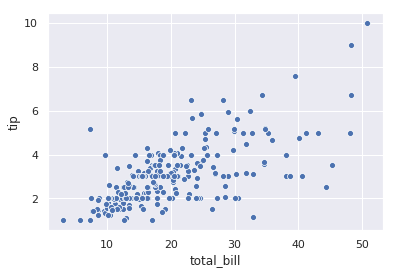

In [5]:
#数据来源可在seaborn的GitHub上查找
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)


接下来，复杂一点，按另一个变量分组（hue参数起了作用），不同类型的方式（style），点的大小（size），并显示具有不同颜色的组：

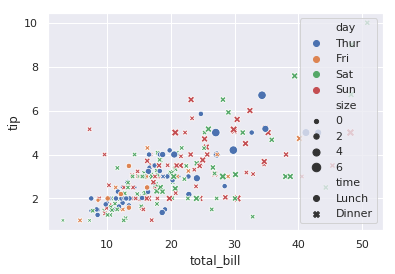

In [6]:
ax = sns.scatterplot(x="total_bill", y="tip",hue="day",style="time",size='size',data=tips)

是不是复杂的多，当然还有很多参数可以改，这里就不一一介绍了，接下来看lineplot。

## 1.2 lineplot（线图）
```
seaborn.lineplot(x=None, y=None, hue=None, size=None, style=None,data=None, palette=None, hue_order=None, hue_norm=None, sizes=None,size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)
 ```
可以看出，参数并没有较散点图有较大的改变，所以话不多说，直接上图：

还是下来个简单的：

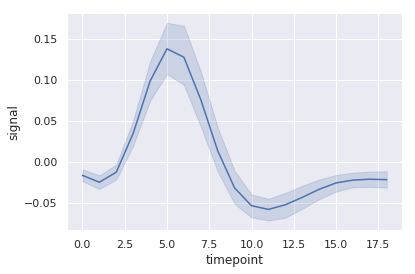

In [7]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

#阴影是默认的置信区间，可设置ci=0,将其去除

接下来，来个复杂一点儿的：

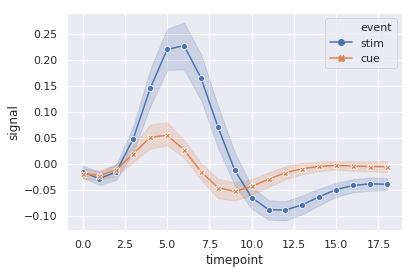

In [8]:
#使用标记而不是破折号来识别组
ax = sns.lineplot(x="timepoint", y="signal",hue="event", style="event",
markers=True, dashes=False, data=fmri)

## 1.3 relplot（关系图）
```
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None,style_order=None, legend='brief', kind='scatter', height=5, aspect=1,facet_kws=None, **kwargs)
```
relplot（关系图）可以看做是lineplot和scatterplot的归约，可以通过kind参数来指定画什么图形，重要参数解释如下：

* kind：默认scatter（散点图），也可以选择kind=‘line’（线图）；
* sizes：List、dict或tuple，可选，简单点就是图片大小，注意和size区分；
* col、row：将决定网格的面数的分类变量，具体看实例；


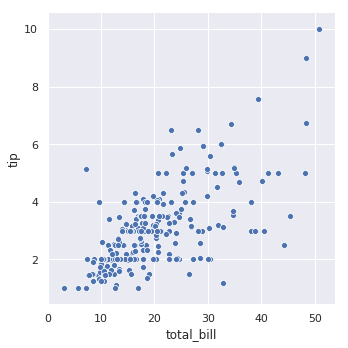

In [9]:
tips = sns.load_dataset("tips")
g = sns.relplot(x="total_bill", y="tip", data=tips)
#两者效果一模一样
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)


其他参数设置：

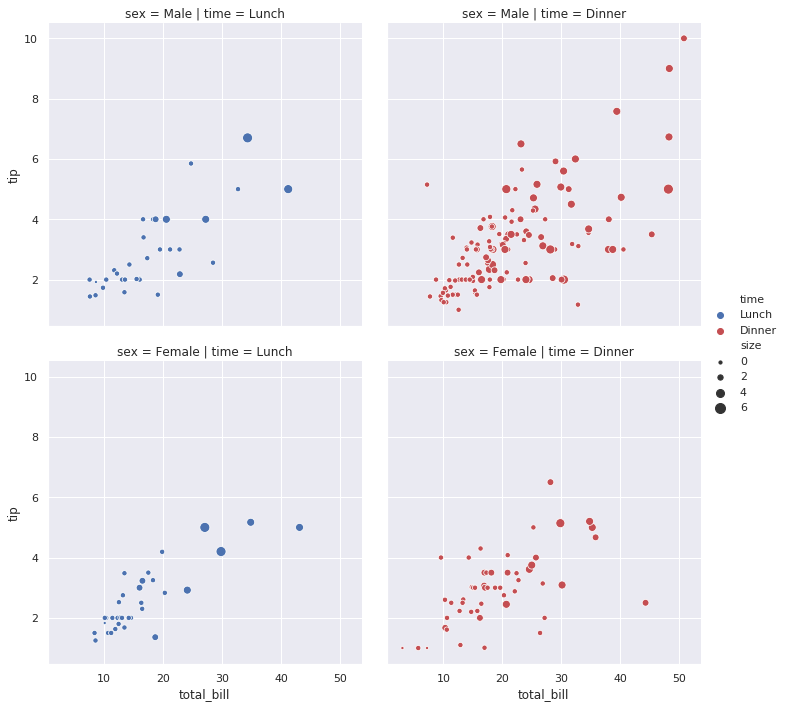

In [10]:
g = sns.relplot(x="total_bill", y="tip", hue="time", size="size",
palette=["b", "r"], sizes=(10, 100),col="time",row='sex', data=tips)


关于kind=‘line’，这里就不画了，重点是理解参数的意义。

# 2.Categorical plots（分类图）
Categorical plots（分类图）可以具体分为下面三种类型，8个小图：
<ol>
  <li>Categorical scatterplots（分类散点图）
stripplot（分布散点图）
swarmplot（分布密度散点图）
Categorical distribution plots（分类分布图）</li>
  <li>Categorical distribution plots（分类分布图）
boxplot（箱线图）
violinplot（小提琴图）
boxenplot（字母价值图？？？）</li>
  <li>Categorical estimate plots（分类估计图）
pointplot（点图）
barplot（条形图）
countplot（计数统计图）</li>
</ol>


## 2.1 Categorical scatterplots（分类散点图）
### 2.1.1 stripplot（分布散点图）
stripplot（分布散点图）的意思就是按照不同类别对样本数据进行分布散点图绘制。stripplot（分布散点图）一般并不单独绘制，它常常与boxplot和violinplot联合起来绘制，作为这两种图的补充。
```
seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, jitter=True, dodge=False, orient=None, color=None, 
palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
```
x，y，data：输入数据可以多种格式传递，在大多数情况下，使用Numpy或Python对象是可能的，但是更可取的是pandas对象，因为相关的名称将用于对轴进行注释。此外，还可以对分组变量使用分类类型来控制情节元素的顺序。
* order：用order参数进行筛选分类类别，例如：order=[‘sun’,‘sat’]；
* jitter：抖动项，表示抖动程度，可以使float，或者True；
* dodge：重叠区域是否分开，当使用hue时，将其设置为True，将沿着分类轴将不同色调级别的条带分开。
* orient：“v” | “h”，vertical（垂直） 和 horizontal（水平）的意思；
基本的图

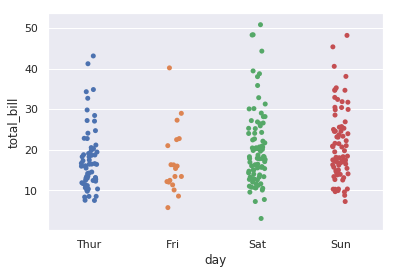

In [12]:
tips = sns.load_dataset("tips")
ax = sns.stripplot(x="day", y="total_bill", data=tips)

多增加几个参数的修改：

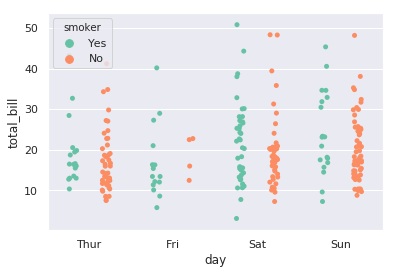

In [13]:
ax = sns.stripplot(x="day", y="total_bill", hue="smoker",data=tips, 
jitter=True,palette="Set2", dodge=True)

### 2.1.2 swarmplot（分布密度散点图）
这个函数类似于stripplot()，但是对点进行了调整(只沿着分类轴)，这样它们就不会重叠。这更好地表示了值的分布，但它不能很好地扩展到大量的观测。
```
seaborn.swarmplot(x=None, y=None, hue=None, data=None, order=None,
 hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, 
 edgecolor='gray', linewidth=0, ax=None, **kwargs)
```
可以看出，swarmplot和stripplot参数上基本一致，少了jitter，因为它显示的是分布密度，不需要添加抖动项。

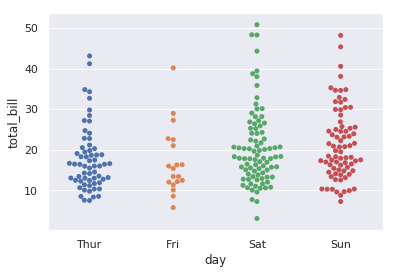

In [14]:
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

多增加几个参数的修改：

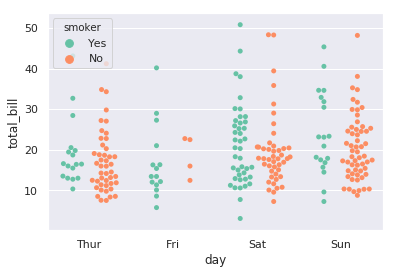

In [15]:
ax = sns.swarmplot(x="day", y="total_bill", hue="smoker",data=tips,palette="Set2", dodge=True)

## 2.2 Categorical distribution plots（分类分布图）
### 2.2.1 boxplot（箱线图）
boxplot（箱线图，又称为盒须图、盒式图）便于在变量之间或跨类别变量级别比较的方式,显示定量数据的分布情况。框显示数据集的四分位数，线显示分布的其余部分，它能显示出一组数据的最大值、最小值、中位数及上下四分位数，使用四分位数范围函数的方法可以确定“离群值”的点。具体用法如下：
```
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, orient=None, color=None, palette=None, saturation=0.75, 
width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
```
* saturation：饱和度，可设置为1；
* width：float，控制箱型图的宽度大小；
* fliersize：float，用于指示离群值观察的标记大小；
* whis：可理解为异常值的上限IQR比例；
* notch：我也不知道……

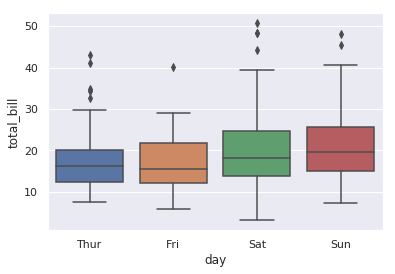

In [19]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

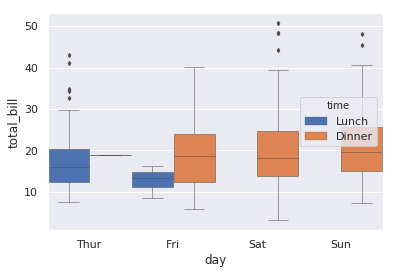

In [20]:
#这些参数不一定要加，简单最好，这里只是为了展示参数的含义
ax = sns.boxplot(x="day", y="total_bill", hue="time",data=tips, 
                 linewidth=0.5,saturation=1,width=1,fliersize=3)

### 2.2.2 violinplot（小提琴图）
violinplot与boxplot扮演类似的角色，箱线图展示了分位数的位置，它显示了定量数据在一个（或多个）分类变量的多个层次上的分布，这些分布可以进行比较。不像箱形图中所有绘图组件都对应于实际数据点，小提琴绘图以基础分布的核密度估计为特征，通过小提琴图可以知道哪些位置的密度较高。在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计。
这是一种可以同时显示多个数据分布的有效和有吸引力的方法，但请记住，估计过程受样本大小的影响，相对较小的样本的小提琴手看起来可能会显得非常平滑。具体用法如下：
```
seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, 
width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, 
color=None, palette=None, saturation=0.75, ax=None, **kwargs)
```
* bw：‘scott’, ‘silverman’, float，控制拟合程度。在计算内核带宽时，可以引用规则的名称（‘scott’, ‘silverman’）或者使用比例（float）。实际内核大小将通过将比例乘以每个bin内数据的标准差来确定；
* cut：空值外壳的延伸超过极值点的密度，float；
* scale：“area”, “count”, “width”，用来缩放每把小提琴的宽度的方法；
* scale_hue：当使用hue分类后，设置为True时，此参数确定是否在主分组变量进行缩放；
* gridsize：设置小提琴图的平滑度，越高越平滑；
* inner：“box”, “quartile”, “point”, “stick”, None,小提琴内部数据点的表示。分别表示：箱子，四分位，点，数据线和不表示；
* split：是否拆分，当设置为True时，绘制经hue分类的每个级别画出一半的小提琴；

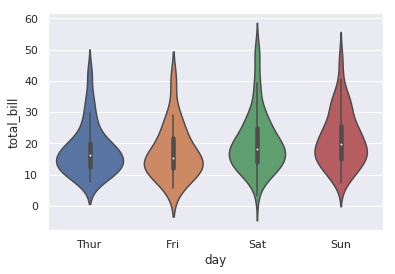

In [21]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

设置按性别分类，调色为“Set2”，分割，以计数的方式，不表示内部。

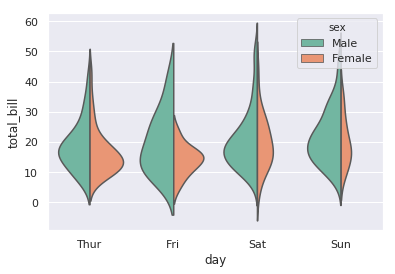

In [22]:
ax = sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, 
palette="Set2", split=True,scale="count", inner=None)


### 2.2.3 violinplot+stripplot（小提琴图+分布散点图）

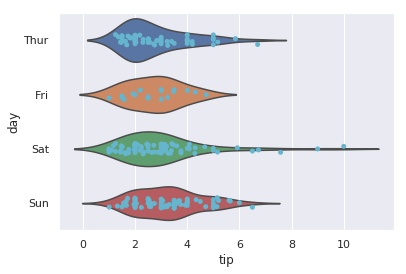

In [23]:
ax = sns.violinplot(x="tip", y="day", data=tips, inner=None,whis=np.inf)
ax = sns.stripplot(x="tip", y="day", data=tips,jitter=True, color="c")

### 2.2.4 violinplot+swarmplot（小提琴图+分布密度散点图）

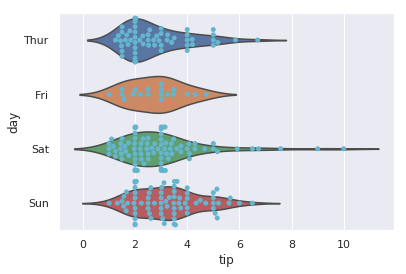

In [24]:
ax = sns.violinplot(x="tip", y="day", data=tips,inner=None, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", data=tips, color="c")

### 2.2.5 boxplot+stripplot（箱线图+分布散点图）

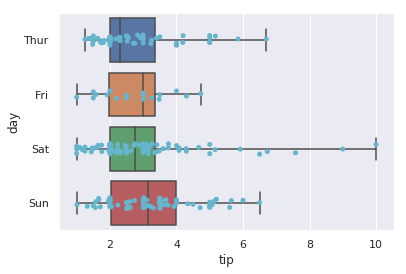

In [25]:
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.stripplot(x="tip", y="day", data=tips,jitter=True, color="c")

### 2.2.6 boxplot+swarmplot（箱线图+分布密度散点图）

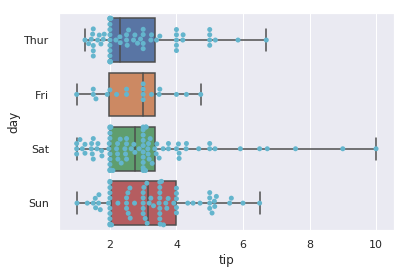

In [26]:
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", data=tips, color="c")

## 2.3 Categorical estimate plots（分类估计图）
### 2.3.1 barplot（条形图）
条形图表示数值变量与每个矩形高度的中心趋势的估计值，用矩形条表示点估计和置信区间，并使用误差线提供关于该估计值附近的不确定性的一些指示。具体用法如下：

seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, 
color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None,
capsize=None, dodge=True, ax=None, **kwargs)

* estimator：用于估计每个分类箱内的统计函数，默认为mean。当然你也可以设置estimator=np.median/np.std/np.var……
* order：选择和空值顺序，例如：order=[‘Sat’,‘Sun’]；
* ci：允许的误差的范围（控制误差棒的百分比，在0-100之间）,若填写"sd",则用标准误差(默认为95)，也可设置ci=None；
* capsize：设置误差棒帽条（上下两根横线）的宽度，float；
* saturation：饱和度；
* errcolor：表示置信区间的线条的颜色；
* errwidth：float，设置误差条线(和帽)的厚度。
根据性别分组：

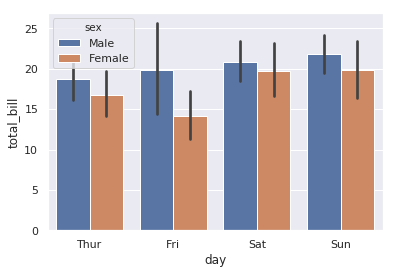

In [27]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

设置estimator为中位数（numpy的统计函数都可以，只要你觉得有意义），设置误差棒的宽度，误差棒的颜色为“c”。

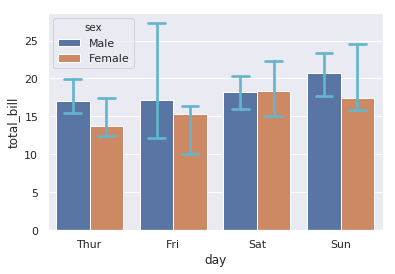

In [28]:
ax = sns.barplot(x="day", y="total_bill",hue='sex', data=tips, 
estimator=np.median,capsize=0.2,errcolor='c')


### 2.3.2 countplot（计数图）
一个计数图可以被认为是一个分类直方图，而不是定量的变量。基本的api和选项与barplot（）相同，因此您可以比较嵌套变量中的计数。（工作原理就是对输入的数据分类，条形图显示各个分类的数量）。具体参数如下：

seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, orient=None, color=None, palette=None, saturation=0.75, 
dodge=True, ax=None, **kwargs)

这里参数并没有太多改变，orient就是改变方向。但是，值得注意的是缺少了一些参数，而且countplot中不能同时输入x和y，却可以使用hue（这我就很纳闷了？？？还望大佬解释解释）。

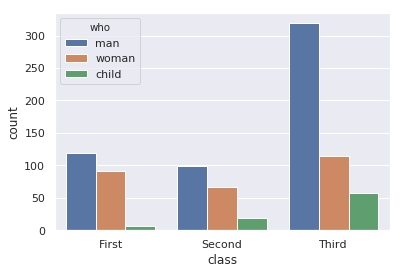

In [29]:
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", hue="who", data=titanic)

### 2.3.3 piontplot（点图）
用散点图符号表示点估计和置信区间，点图代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示。点图可能比条形图（barplot）更有用于聚焦一个或多个分类变量的不同级别之间的比较。他们尤其善于表现交互作用：一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化。连接来自相同色调等级的每个点的线允许交互作用通过斜率的差异进行判断，这比对几组点或条的高度比较容易。具体用法如下：

seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, 
hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, 
units=None, markers='o', linestyles='-', dodge=False, join=True, 
scale=1, orient=None, color=None, palette=None, errwidth=None, 
capsize=None, ax=None, **kwargs)

* join：默认两个均值点会相连接，若不想显示，可以通过join=False参数实现；
* scale：float，均值点（默认）和连线的大小和粗细。
* tips = sns.load_dataset("tips")
* ax = sns.pointplot(x="time", y="total_bill", data=tips)

尝试更多参数，按性别分组，用中位数进行比较，分开显示，使用调色板，修改标记类型和线条类型（很多参数都不是必要的，这里只是尽量充分介绍其用法）。

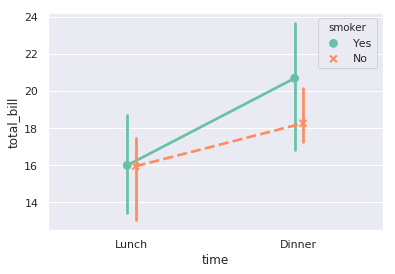

In [30]:
ax = sns.pointplot(x="time", y="total_bill", hue="smoker",data=tips,estimator=np.median,
dodge=True, palette="Set2",markers=["o", "x"],linestyles=["-", "--"])

### 2.3.4 catplot（）
该函数提供了对几个轴级函数的访问，这些函数使用几种可视化表示形式之一显示一个数字变量和一个或多个分类变量之间的关系。其实说白了就是利用kind参数来画前面Categorical plots（分类图）中的任意8个图形。具体如下：

seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, 
col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, 
order=None, hue_order=None, row_order=None, col_order=None, kind='strip',
 height=5, aspect=1, orient=None, color=None, palette=None, legend=True, 
 legend_out=True, sharex=True, sharey=True, margin_titles=False, 
 facet_kws=None, **kwargs)

有没有发现，它和regplot（关系图）的使用方法差不多？

* kind：默认strip（分布散点图），也可以选择“point”, “bar”, “count”,
* col、row：将决定网格的面数的分类变量，可具体制定；
* col_wrap：指定每行展示的子图个数，但是与row不兼容；
* row_order, col_order : 字符串列表，安排行和列，以及推断数据中的对象；
* height，aspect：与图像的大小有关；
* sharex，sharey：bool, ‘col’or ‘row’，是否共享想，x，y坐标；
注：单个图形里面的参数也是可以传入里面的

绘制一个小提琴图，按数据中的kind类别分组（数据中的），不要中心框线。

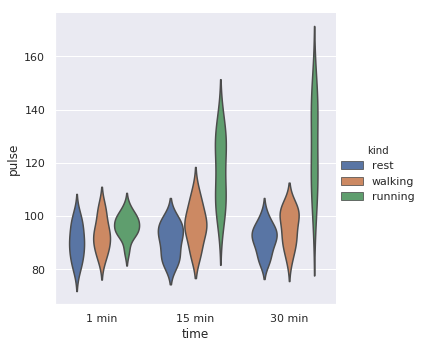

In [31]:
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="violin",inner=None)

使用diet来分成几个图形，并用height、aspect来设置图片比例：

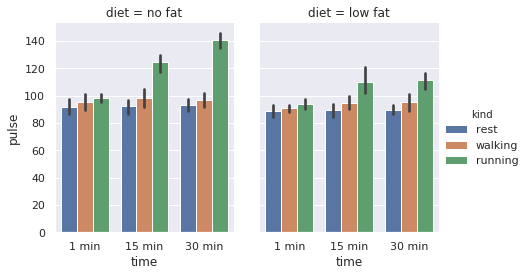

In [32]:
g = sns.catplot(x="time", y="pulse", hue="kind",kind='bar',col="diet", 
data=exercise,height=4, aspect=0.8)

# 3 Distribution plots（分布图）
## 3.1 distplot（直方图）
直方图又称质量分布图，它是表示资料变化情况的一种主要工具。用直方图可以解析出资料的规则性，比较直观地看出产品质量特性的分布状态，对于资料分布状况一目了然，便于判断其总体质量分布情况。直方图表示通过沿数据范围形成分箱（好像是等距分箱？），然后绘制条以显示落入每个分箱的观测次数的数据分布。具体参数如下：
```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, 
hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None,
 vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```
* bins：int或list，控制直方图的划分，设置矩形图（就是块儿的多少）数量，除特殊要求一般默认；
* hist：是否显示方块；
* kde：是否显示核密度估计曲线；
* rug：控制是否生成观测数值的小细条（边际毛毯）；
* fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布)；
-{hist, kde, rug, fit}_kws ：参数接收字典类型，可以自行定义更多高级的样式；
* norm_hist：若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True)；
* vertical：放置的方向，如果为真，则观测值位于y-轴上（默认False，x轴上）；
* axlabel : string, False, or None, 设置标签。
设置随机种子（666），随机生成1000个符合正态分布的数：

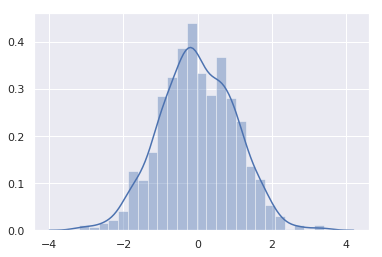

In [33]:
np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x)

修改更多参数，设置方块的数量，方块、密度曲线和边际毛毯都显示，颜色为‘k’，axlabel=‘norm’。

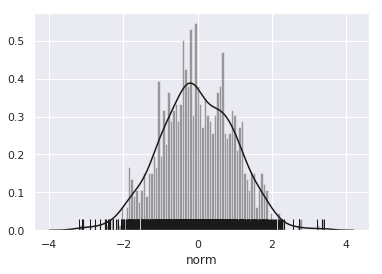

In [34]:
np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x, bins=100,hist=True, kde=True, rug=True,color='k',axlabel='norm')


## 3.2 kdeplot（核密度图）
核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。具体用法如下：
```
seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', 
bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, 
shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
```
* data、data2：表示可以输入双变量，绘制双变量核密度图；
* shade：是否填充阴影，默认不填充；
* vertical：放置的方向，如果为真，则观测值位于y轴上（默认False，x轴上）；
* kernel：{‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }。默认高斯核（‘gau’）二元KDE只能使用高斯核。至于什么是核函数，这个学问就大了，建议多看看论文；
* bw：{‘scott’ | ‘silverman’ | scalar | pair of scalars }。四类核密度带方法，默认scott (斯考特带宽法），建议下来了解一下这四种方法的区别；
* gridsize：这个参数指的是每个格网里面，应该包含多少个点，越大，表示格网里面的点越多（觉得电脑OK的可以试试，有惊喜），越小表示格网里面的点越少；
* cut：参数表示，绘制的时候，切除带宽往数轴极限数值的多少，这个参数可以配合bw参数使用；
* cumulative：是否绘制累积分布；
* shade_lowest：是否有最低值渲染，这个参数只有在二维密度图上才有效；
* clip：表示查看部分结果，是一个区间；
* cbar：参数若为True，则会添加一个颜色棒(颜色帮在二元kde图像中才有)；
有木有觉得参数超多，所以说核密度图还是比较难的（虽然容易画，但原理很复杂）。下面看几个简单的例子：简单生成一个多元正态分布（对numpy随机分布不了解的朋友，可以看我总结的numpy函数）。


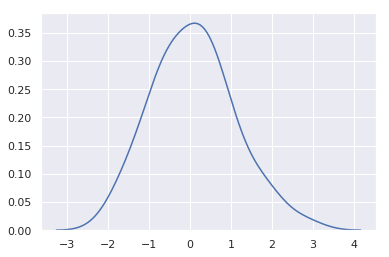

In [35]:
mean, cov = [0, 2], [(1, .5), (.5, 1)]
#这是一个多元正态分布
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

接下来绘制双变量核密度图①：

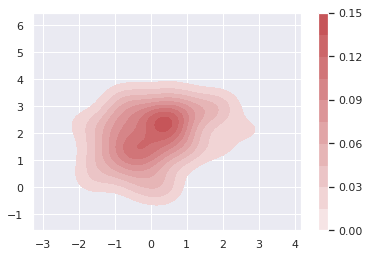

In [36]:
ax=sns.kdeplot(x,y,shade=True,shade_lowest=False,cbar=True,color='r')

接下来绘制双变量核密度图②：二色二元密度图，使用大名鼎鼎的鸢尾花数据集

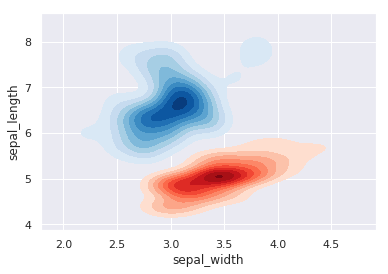

In [37]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,cmap="Reds",
 shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,cmap="Blues", 
shade=True, shade_lowest=False)

## 3.3 jointplot（联合分布图）
联合概率分布简称联合分布，是两个及以上随机变量组成的随机向量的概率分布。根据随机变量的不同，联合概率分布的表示形式也不同。对于离散型随机变量，联合概率分布可以以列表的形式表示，也可以以函数的形式表示；对于连续型随机变量，联合概率分布通过一非负函数的积分表示。具体参数如下：
```
seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, 
height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None,
 marginal_kws=None, annot_kws=None, **kwargs)
```
* x,y：为DataFrame中的列名或者是两组数据，data指向dataframe；
* kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }。默认散点图；
* stat_func：用于计算统计量关系的函数；
* ratio：中心图与侧边图的比例，越大、中心图占比越大；
* dropna：去除缺失值；
* height：图的尺度大小（正方形）；
* space：中心图与侧边图的间隔大小；
* xlim，ylim：x，y的范围
用边缘直方图绘制散点图：

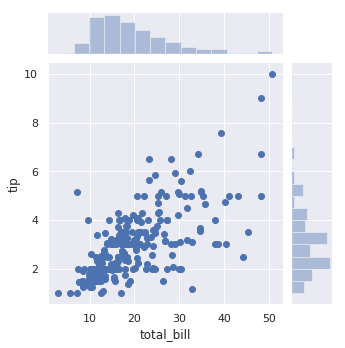

In [38]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,height=5)

#用密度估计替换散点图和直方图，调节间隔和比例：

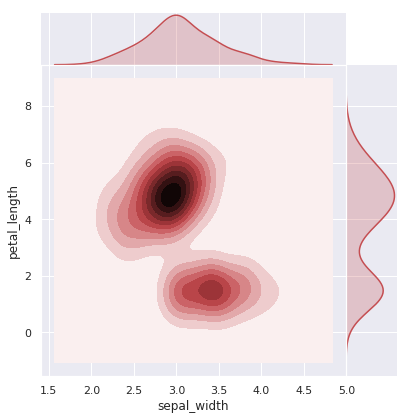

In [39]:
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris,kind="kde", space=0,ratio=6 ,color="r")

## 3.4 pairplot（变量关系组图）
在数据集中绘制成对关系的图。默认情况下，该函数将创建一个轴网格，这样数据中的每个变量都将通过跨一行的y轴和跨单个列的x轴共享。对对角线轴的处理方式不同，绘制的图显示该列中变量的数据的单变量分布。此外，还可以在行和列上显示变量子集或绘制不同的变量。具体如下：
```
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, 
x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None,
 height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, 
 grid_kws=None, size=None)
```
* var：data中的子集，否则使用data中的每一列；
* x_vars / y_vars：可以具体细分，谁与谁比较；
* kind：{‘scatter’, ‘reg’}；
* diag_kind：{‘auto’, ‘hist’, ‘kde’}。单变量图（自己与自己比较）的绘图，对角线子图的图样。默认情况取决于是否使用“hue”。
采用默认格式绘制鸢尾花数据集，这样对于分类问题来说并不能有效的观察数据情况。


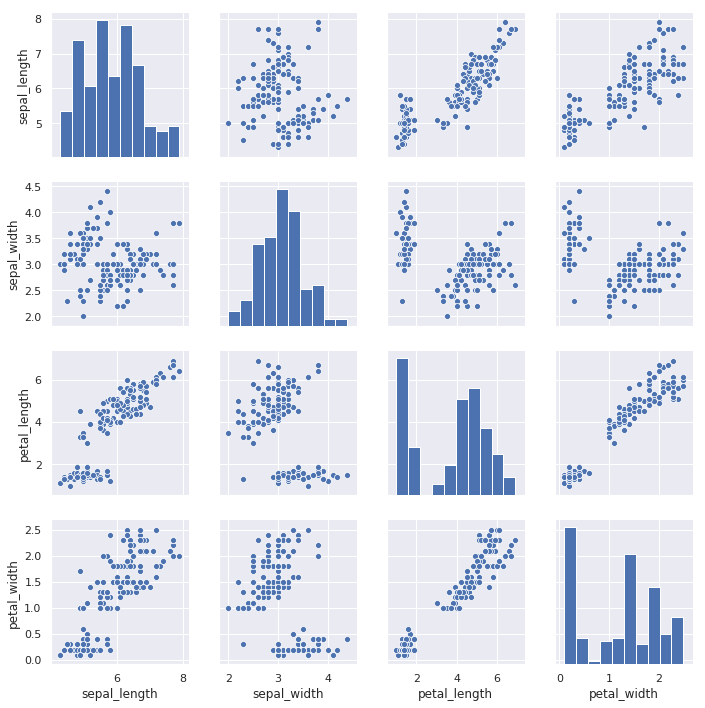

In [40]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

使用hue="species"对不同种类区分颜色绘制，并使用不同标记：

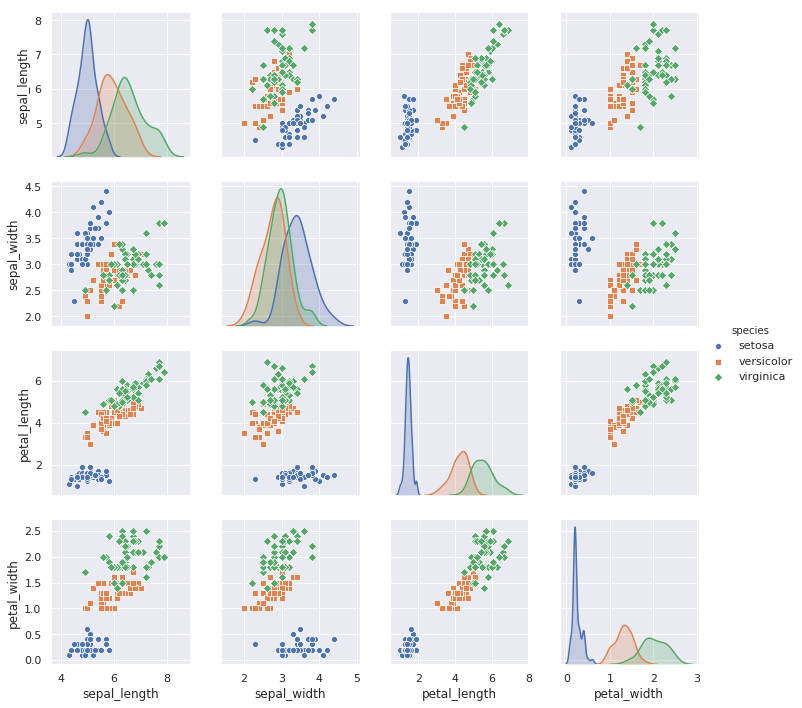

In [41]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

# 4 Regression plots（回归图）
## 4.1 lmplot（回归图）
许多数据集都有着众多连续变量。数据分析的目的经常就是衡量变量之间的关系，lmplot() 是一个非常有用的方法，它会在绘制二维散点图时，自动完成回归拟合。具体参数如下：
```
seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, 
col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, 
hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, 
x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, 
n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, 
logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, 
y_jitter=None, scatter_kws=None, line_kws=None, size=None)
```
* col，row：和前面一样，根据所指定属性在列，行上分类；
* col_wrap：指定每行的列数，最多等于col参数所对应的不同类别的数量；
* aspect：控制图的长宽比；
* x_jitter，y_jitter：给x，y轴随机增加噪音点，设置这两个参数不影响最后的回归直线；
* order：多项式回归，控制进行回归的幂次，设定指数，可以用多项式拟合；
* logistic：逻辑回归；
* robust：如果是True，使用statsmodels来估计一个稳健的回归（鲁棒线性模型）。这将减少异常值。请注意 logistic回归和robust回归相较于简单线性回归需要更大的计算量，其置信区间的产生也依赖于bootstrap采样，你可以关掉置信区间估计来提高速度（ci=None）；
* lowess：如果是True，使用statsmodels来估计一个非参数的模型(局部加权线性回归)。这种方法具有最少的假设，尽管它是计算密集型的，但目前无法为这类模型绘制置信区间；
* logx：转化为log(x)
* truncate：默认情况下，绘制散点图后绘制回归线以填充x轴限制。如果为True，则它将被数据限制所限制；
绘制一个第三个变量的条件，并绘制不同颜色的回归图：

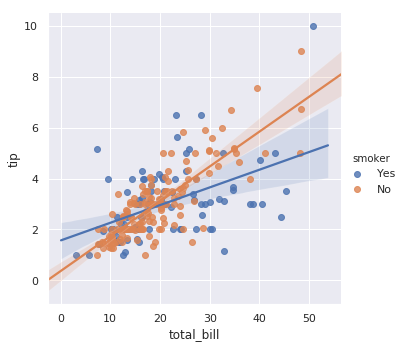

In [42]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

将变量分为多行，并改变大小：

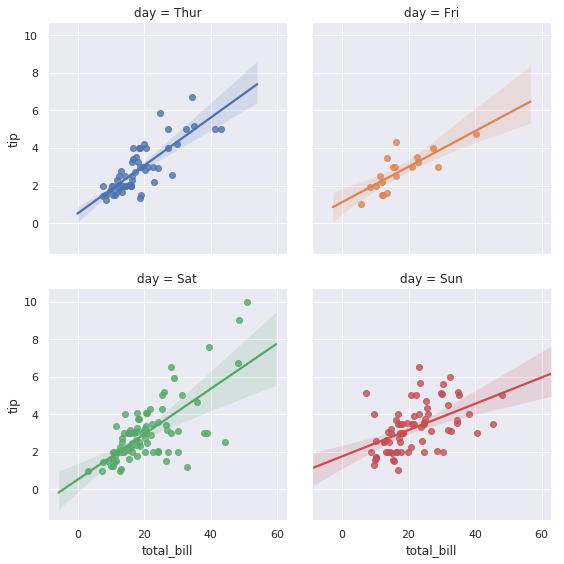

In [43]:
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",data=tips,
 col_wrap=2, height=4)

## 4.2 regplot（）
regplot()和lmplot()都可以绘制线性回归曲线。这两个函数非常相似，甚至共有一些核心功能。具体参数如下：
```
seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, 
lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, 
marker='o', scatter_kws=None, line_kws=None, ax=None)
```
至于两者有什么具体的区别，我也不清楚，但是感觉lmplot()要比regplot()强大一点……以后再总结吧，还是继续绘图。

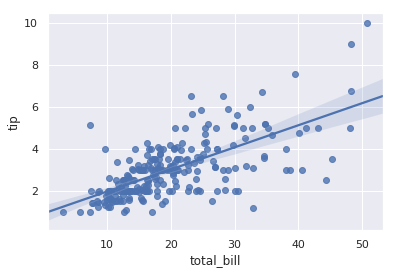

In [44]:
g = sns.regplot(x="total_bill", y="tip",data=tips)

尝试逻辑回归分类：

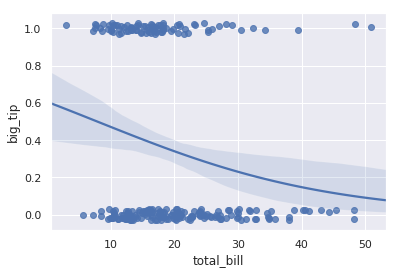

In [45]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .175
ax = sns.regplot(x="total_bill", y="big_tip", data=tips,logistic=True, n_boot=500, y_jitter=.03)


# 5.Matrix plots（矩阵图）
## 5.1 heatmap（热力图）
利用热力图可以看数据表里多个特征两两的相似度，类似于色彩矩阵。具体参数如下：
```
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, 
robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', 
cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', 
yticklabels='auto', mask=None, ax=None, **kwargs)
```
* data：矩阵数据集，可以使numpy的数组（array），如果是pandas的dataframe，则df的index/column信息会分别对应到heatmap的columns和rows；
* vmax,vmin：图例中最大值和最小值的显示值，没有该参数时默认不显示；
* cmap：从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，或者表示颜色的列表；
* center：数据表取值有差异时，设置热力图的色彩中心对齐值。通过设置center值，可以调整生成的图像颜色的整体深浅；设置center数据时，如果有数据溢出，则手动设置的vmax、vmin会自动改变 ；
* robust：默认取值False；如果是False，且没设定vmin和vmax的值，热力图的颜色映射范围根据具有鲁棒性的分位数设定，而不是用极值设定；
* annot(annotate的缩写)：默认取值False；如果是True，在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据；
* fmt：字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字；
* annot_kws:默认取值False；如果是True，设置热力图矩阵上数字的大小颜色字体；
* square:设置热力图矩阵小块形状，默认值是False；
* xticklabels, yticklabels:控制每行列标签名的输出。默认值是auto，自动选择标签的标注间距，将标签名不重叠的部分(或全部)输出。如果是True，则以DataFrame的列名作为标签名；
* mask:控制某个矩阵块是否显示出来。默认值是None。如果是布尔型的DataFrame，则将DataFrame里True的位置用白色覆盖掉。
绘制一个简单的numpy数组的热力图：

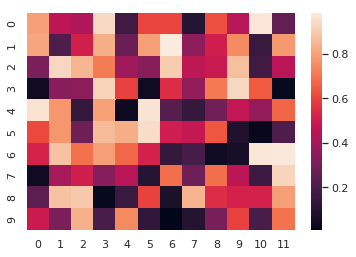

In [46]:
x = np.random.rand(10, 12)
ax = sns.heatmap(x)

显示数字和保留几位小数，并修改数字大小字体颜色格式：

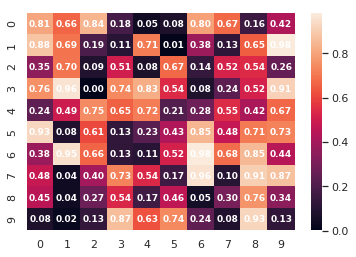

In [47]:
x= np.random.rand(10, 10)
ax = sns.heatmap(x,annot=True,annot_kws={'size':9,'weight':'bold', 'color':'w'},fmt='.2f')

## 5.2 clustermap（聚类图）
clustermap() 可以将矩阵数据集绘制为层次聚类热图。具体参数如下：
```        
seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', 
z_score=None, standard_scale=None, figsize=None, cbar_kws=None, row_cluster=True, 
col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, 
mask=None, **kwargs)
```
说实在的这个我也不太懂，就抛砖引玉的画一下图。

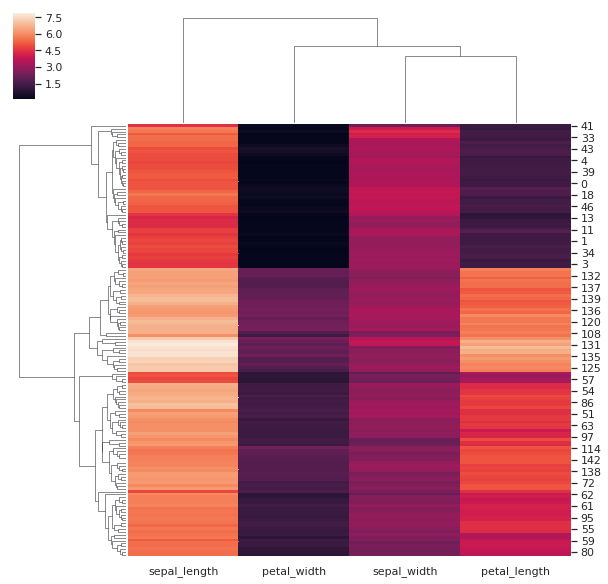

In [48]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

# 6 FacetGrid（）
在探索中多维数据时，一种有用的方法是在数据集的不同子集上绘制同一类型图的多个子图。该类将数据集映射到与数据集中变量级别相对应的行和列网格中排列的多个轴上。它生成的图形通常被称为“格子”或“格子”绘图，它可以使查看者快速观察到有关复杂数据的大量信息。

FacetGrid当您想要在数据集的子集中分别可视化变量的分布或多个变量之间的关系时，该类非常有用。一个FacetGrid可以与多达三个维度可以得出：row，col，和hue。前两个与得到的轴阵列有明显的对应关系; 将hue变量视为沿深度轴的第三个维度，其中不同的级别用不同的颜色绘制。通过使用FacetGrid数据框初始化对象以及将形成网格的行，列或hue维度的变量名称来使用该类。这些变量（hue）应该是分类的或离散的，然后变量的每个级别的数据将用于沿该轴的小平面。此外，每个的relplot()，catplot()以及lmplot()在内部使用这些对象。

在大多数情况下，与直接使用FacetGrid相比，使用图形级函数(例如relplot()或catart()要好得多。具体参数如下：
```
seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, 
sharex=True, sharey=True, height=3, aspect=1, palette=None, 
row_order=None, col_order=None, hue_order=None, hue_kws=None, 
dropna=True, legend_out=True, despine=True, margin_titles=False, 
xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
```
其实细心的您可能已经发现某些具有相同的规律，不妨看看前面relplot（）、catplot（）、lmplot（）的参数，是不是基本上差不多呢？没错，其实上面三个绘图函数，都用到了FacetGrid（）的思想。此外，pairplot（）走某种意义上来说，也与他们很像。

FacetGrid并不能直接绘制我们想要的图像，它的基本工作流程是FacetGrid使用数据集和用于构造网格的变量初始化对象。然后，可以通过调用FacetGrid.map()或将一个或多个绘图函数应用于每个子集 FacetGrid.map_dataframe()，最后，可以使用其他修改参数的方法调整绘图。

下面展示具体实例：使用TIPS数据集初始化2x2个面网格:

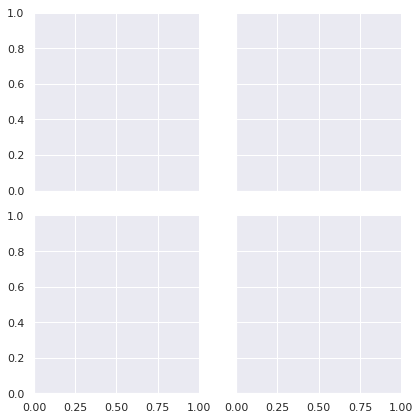

In [49]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time", row="smoker")#2*2

然后，在每个方面上绘制一个二元函数：

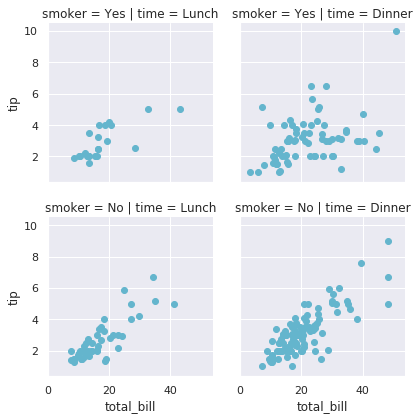

In [50]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", color="c")

这里我其实有个疑问，为什么g.map()里面用的是plt.scatter等matplotlib.pyplot来绘制图形，我尝试了用seaborn里面的sns.scatterplot等也可以绘制相应的图形，区别在于点的大小形状不一样，还望各位看官指点一下其中的差别。

接下来比较一下FacetGrid.map()绘图与relplot（）、catplot（）、lmplot（）绘图的区别（这里只比较relplot（）来绘制散点图）：

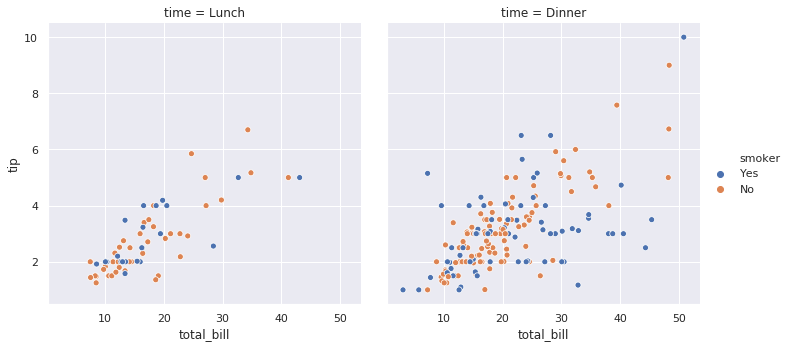

In [51]:
sns.relplot(x="total_bill", y="tip", color="c",col="time",  hue="smoker",data=tips)

看出来了吗？结果是不是很清晰，一目了然？所以说：在大多数情况下，与直接使用FacetGrid相比，使用图形级函数(例如relplot()或catart()要好得多。

# 7 PairGrid（）
用于绘制数据集中成对关系的子图网格。该类将数据集中的每个变量映射到多轴网格中的列和行。不同的轴级绘图函数可用于绘制上、下三角形的二元图解，并可在对角线上显示每个变量的边缘分布。读到这里你就会发现，它和pairplot（）有什么区别呢？

其实PairGrid和pairplot从原理来说是一样的，但是前面我们可以发现pairplot绘制的图像上、下三角形是关于主对角线对称的，而PairGrid则可修改上、下三角形和主对角线的图像形状。具体事例如下：

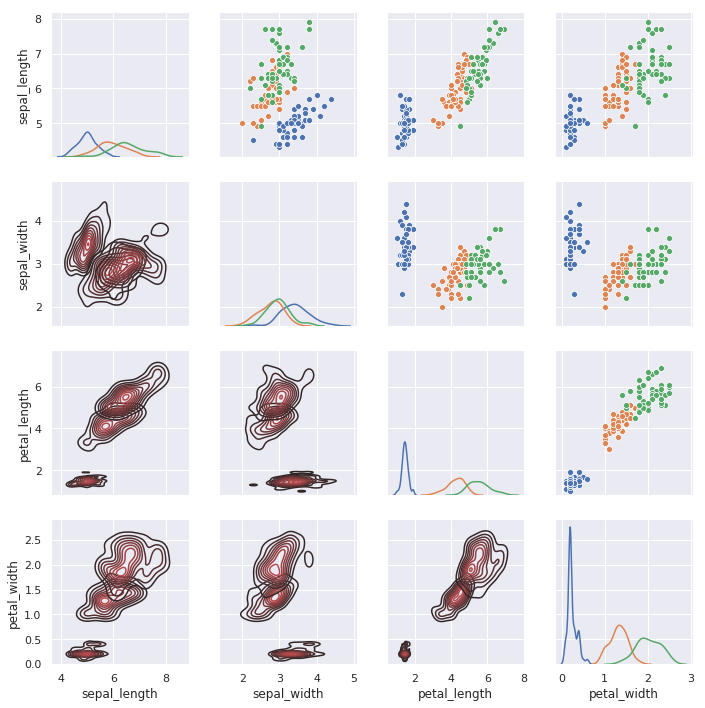

In [52]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris,hue="species")
g = g.map_upper(sns.scatterplot)#在上对角线子图上用二元函数绘制的图
g = g.map_lower(sns.kdeplot,color='r')#在下对角线子图上用二元函数绘制的图
g = g.map_diag(sns.kdeplot)#对角线单变量子图

# 8 主题和颜色
## 8.1 主题（set_style）
seaborn中主要有以下几个主题：

In [53]:
sns.set_style("whitegrid")  # 白色网格背景
sns.set_style("darkgrid")   # 灰色网格背景
sns.set_style("dark")       # 灰色背景
sns.set_style("white")      # 白色背景
sns.set_style("ticks")      # 四周加边框和刻度

## 8.2 颜色（color_palette()）